In [1]:
# Import packages
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
import math

In [2]:
def get_elec_sub_90(start_date, end_date):
    # Format URL
    DNO = "12" # London area.
    VOLTAGE = "LV" # Low voltage.
    start_date = start_date.strftime("%d-%m-%Y")
    end_date = end_date.strftime("%d-%m-%Y")
    url = f"https://odegdcpnma.execute-api.eu-west-2.amazonaws.com/development/prices?dno={DNO}&voltage={VOLTAGE}&start={start_date}&end={end_date}"
    
    # Hit the API to get the JSON.
    response = urlopen(url)
    data_json = json.loads(response.read())
    
    # Format as a dataframe.
    df = pd.json_normalize(data_json["data"]["data"])
    df = df.drop(columns="unixTimestamp")
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M %d-%m-%Y")
    df.set_index("Timestamp", inplace=True)
    
    return df

In [14]:
def get_electricity(start_date="01-10-2022", end_date="01-01-2023", groupBy='M'):
    """Get the weekly electricity as a pandas dataframe. 
    
    start_date: Format "DD-MM-YYYY". Start date.
    end_date: Format "DD-MM-YYYY". End date.
    groupBy: Format 'Y', 'M', or 'D'. Group by year, month or day."""
    
    # Set constants.
    DAY_LIMIT = 90
    
    # Work out if date is over 90 days.
    date_format = "%d-%m-%Y"
    start = datetime.strptime(START_DATE, date_format)
    end = datetime.strptime(END_DATE, date_format)
    delta = (end - start).days

    # Split starts and ends into separate dates.
    if delta > DAY_LIMIT:
        nRuns = math.ceil(delta / DAY_LIMIT)
        output_dfs = []
        for iRun in range(nRuns):  
            this_start = start + timedelta(days=(iRun * DAY_LIMIT))
            this_end = this_start + timedelta(days=DAY_LIMIT)
            output_dfs.append(get_elec_sub_90(this_start, this_end))

        # Concatenate dfs.
        elec_prices = pd.concat(output_dfs)
        
    else:
        elec_prices = get_elec_sub_90(start_date, end_date)
        
    # Get mean of each week, month, or day.
    elec_monthly = elec_prices.resample(groupBy).mean()

    return elec_monthly

                     Overall
Timestamp                   
2022-08-01 00:00:00    10.61
2022-08-01 00:30:00    10.61
2022-08-01 01:00:00    10.61
2022-08-01 01:30:00    10.61
2022-08-01 02:00:00    10.61
...                      ...
2023-01-27 22:00:00    11.44
2023-01-27 22:30:00    11.44
2023-01-27 23:00:00    11.20
2023-01-27 23:30:00    11.20
2023-01-28 00:00:00    11.20

[8642 rows x 1 columns]


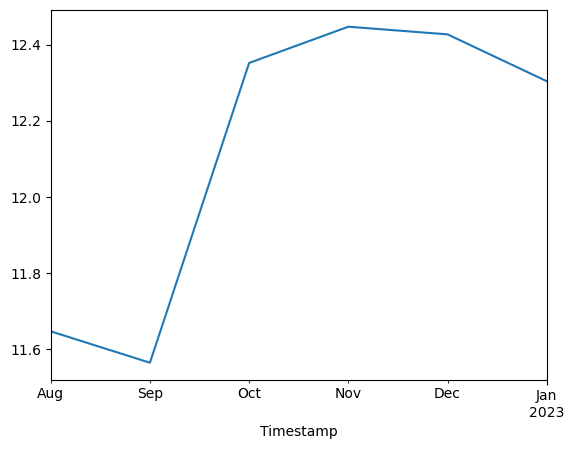

In [15]:
# Call the function.
START_DATE = "01-08-2022"
END_DATE = "01-01-2023"
GROUP_BY = "M"
elec_by_month = get_electricity(START_DATE, END_DATE, GROUP_BY)

# Plot the response.
x = "Date"
y = "Price (£/kWh)"
ax = elec_by_month["Overall"].plot(x=x, y=y)
plt.show()

In [12]:
elec_by_month

,Overall
Timestamp,
2022-08-31,11.647661
2022-09-30,11.565278
2022-10-31,12.352156
2022-11-30,12.447250
2022-12-31,12.427177
2023-01-31,12.304333


In [5]:
##############################################################################################################

In [6]:
# Format URL
DNO = "12" # London area.
VOLTAGE = "LV" # Low voltage.
START_DATE = "01-09-2022"
END_DATE = "01-01-2023"

url = f"https://odegdcpnma.execute-api.eu-west-2.amazonaws.com/development/prices?dno={DNO}&voltage={VOLTAGE}&start={START_DATE}&end={END_DATE}"

In [7]:
# Hit the API to get the JSON.
response = urlopen(url)
data_json = json.loads(response.read())
print(json.dumps(data_json, indent=2)[0:300])

{
  "status": "success",
  "data": {
    "dnoRegion": "12",
    "voltageLevel": "LV",
    "data": [
      {
        "Overall": 10.54,
        "unixTimestamp": 1661990400,
        "Timestamp": "00:00 01-09-2022"
      },
      {
        "Overall": 10.54,
        "unixTimestamp": 1661992200,
        "


In [8]:
# Show the response.
df = pd.json_normalize(data_json["data"]["data"])
df = df.drop(columns="unixTimestamp")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M %d-%m-%Y")
df.set_index("Timestamp", inplace=True)
df

,Overall
Timestamp,
2022-09-01 00:00:00,10.54
2022-09-01 00:30:00,10.54
2022-09-01 01:00:00,10.54
2022-09-01 01:30:00,10.54
2022-09-01 02:00:00,10.54
...,...
2022-12-31 22:00:00,11.36
2022-12-31 22:30:00,11.36
2022-12-31 23:00:00,11.36


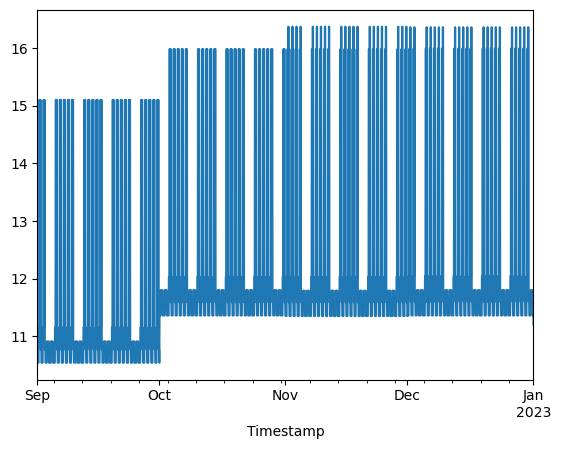

In [9]:
# Plot the response.
x = "Date/Time"
y = "Price (£/kWh)"
ax = df["Overall"].plot(x=x, y=y)
plt.show()

In [10]:
# Get mean of each week.
df_weekly = df.resample('M').mean()
df_weekly

,Overall
Timestamp,
2022-09-30,11.565278
2022-10-31,12.352823
2022-11-30,12.447250
2022-12-31,12.427177
2023-01-31,11.200000


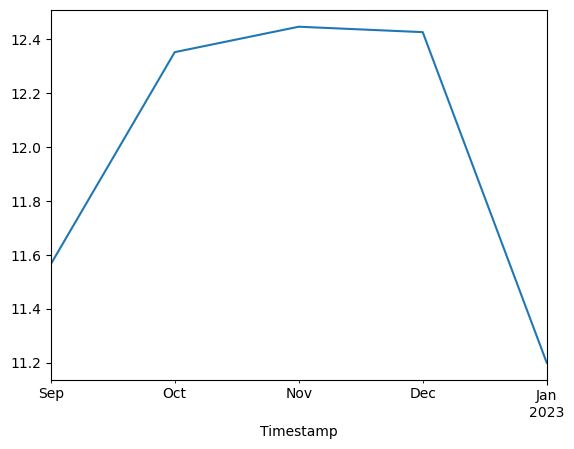

In [11]:
# Plot the response.
x = "Date"
y = "Price (£/kWh)"
ax = df_weekly["Overall"].plot(x=x, y=y)
plt.show()